In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Quick preview
print(df.shape)
df.head()


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check data types & null values
df.info()

# Convert TotalCharges to numeric (some entries are empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Target encoding: Yes → 1, No → 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Get list of categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X,y)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0                 0       1           29.85         29.85        False   
1                 0      34           56.95       1889.50         True   
2                 0       2           53.85        108.15         True   
3                 0      45           42.30       1840.75         True   
4                 0       2           70.70        151.65        False   
...             ...     ...             ...           ...          ...   
7038              0      24           84.80       1990.50         True   
7039              0      72          103.20       7362.90        False   
7040              0      11           29.60        346.45        False   
7041              1       4           74.40        306.60         True   
7042              0      66          105.65       6844.50         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            True           False             False   
1

[[913 120]
 [161 213]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407

ROC-AUC: 0.8366512054086792


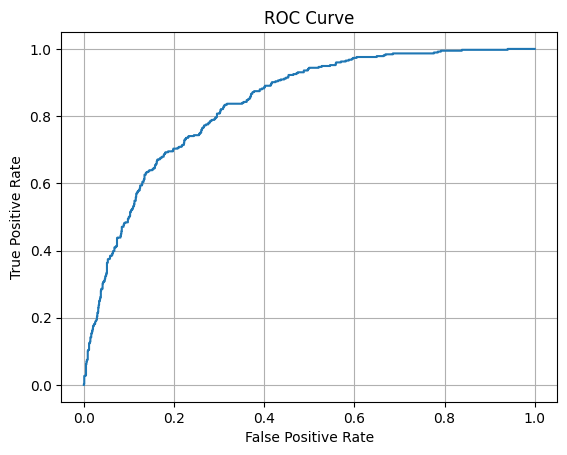

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", rf.score(X_test, y_test))


Random Forest Accuracy: 0.7903340440653873


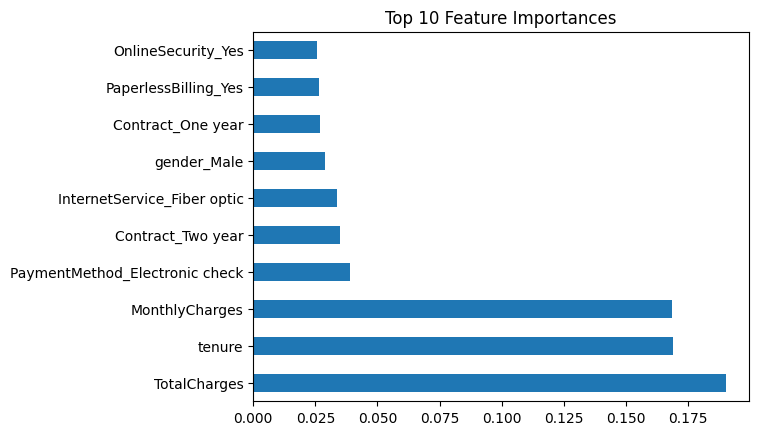

In [11]:
import seaborn as sns

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [27]:
# Pick one customer
one_customer = X_test.iloc[[0]]

# Predict churn
prediction = rf.predict(one_customer)[0]
proba = rf.predict_proba(one_customer)[0][1]

print(f"Prediction: {'Churn' if prediction == 1 else 'Not Churn'}")
print(f"Churn Probability: {proba:.2f}")

# Show top 5 features for this customer
print("\nTop factors for prediction:")
print(one_customer[top_features.index].T)


Prediction: Not Churn
Churn Probability: 0.00

Top factors for prediction:
                                    974
TotalCharges                    4542.35
tenure                               59
MonthlyCharges                    75.95
PaymentMethod_Electronic check    False
Contract_Two year                  True
InternetService_Fiber optic       False
gender_Male                       False
Contract_One year                 False
PaperlessBilling_Yes               True
OnlineSecurity_Yes                False


In [7]:
import pandas as pd

# Load the Telco Customer Churn dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for clean plots
sns.set(style="whitegrid")


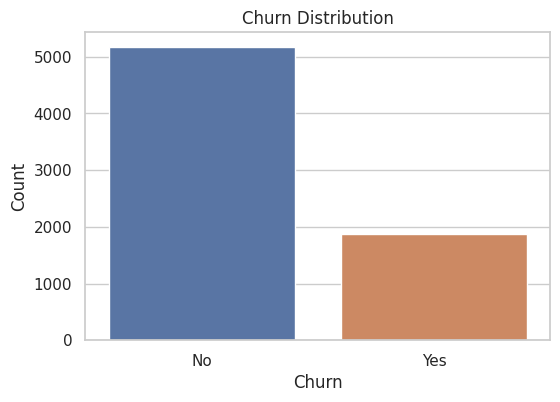

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [12]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


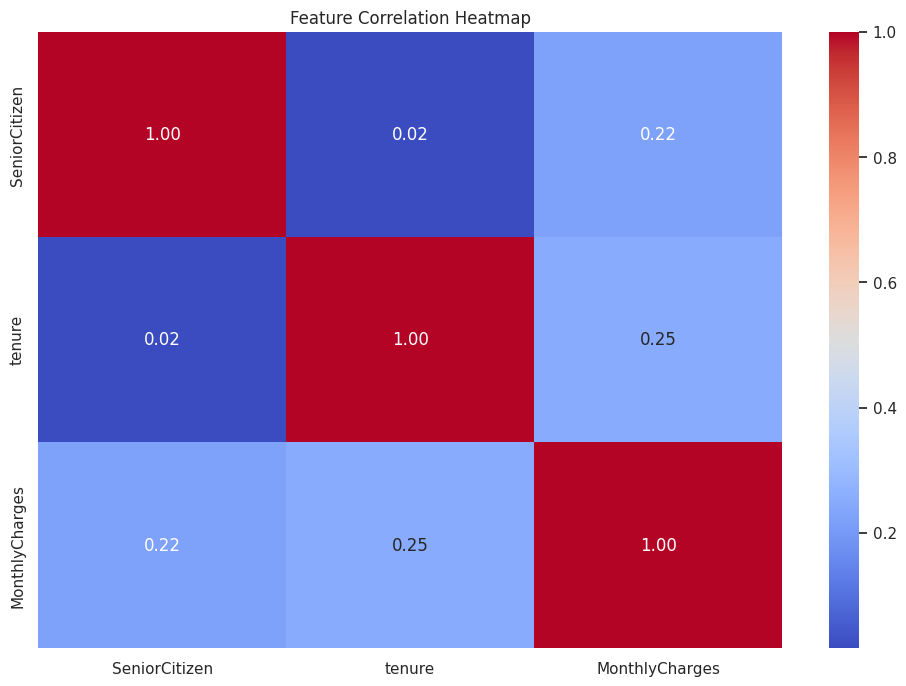

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

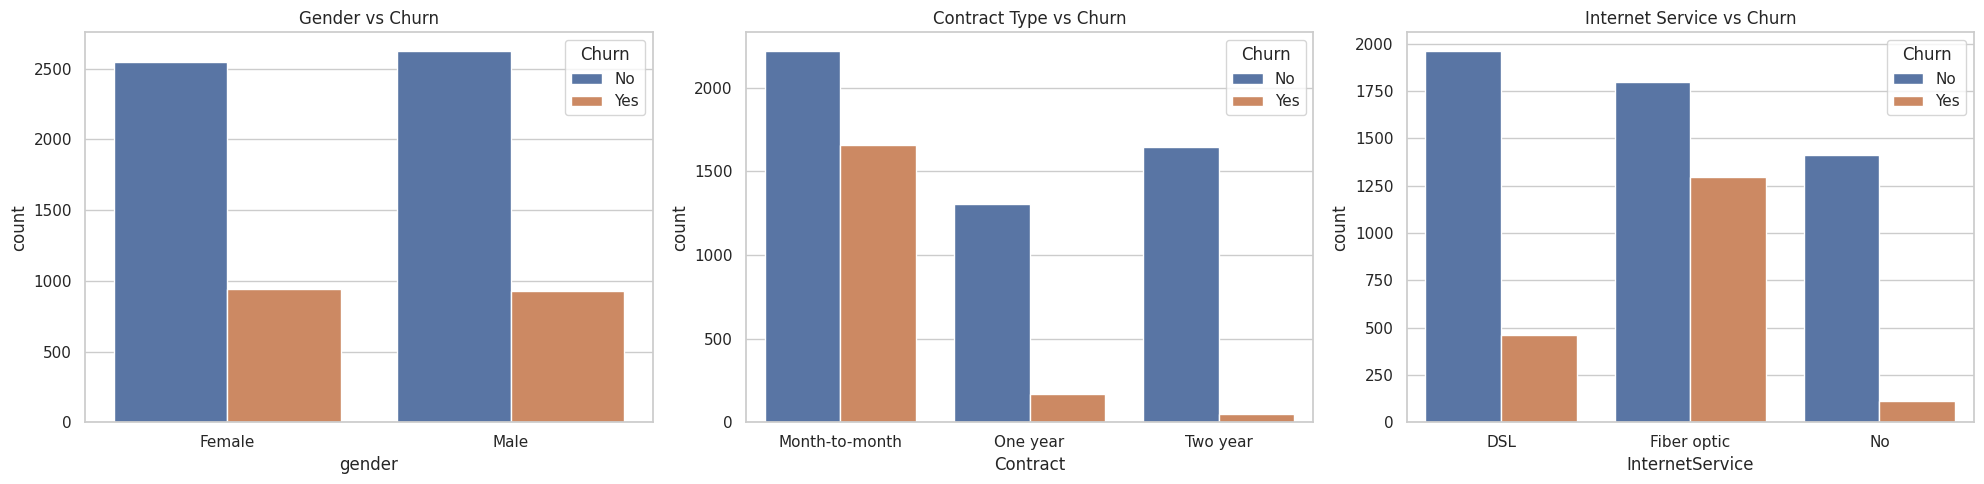

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Gender vs Churn')

sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Contract Type vs Churn')

sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[2])
axes[2].set_title('Internet Service vs Churn')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

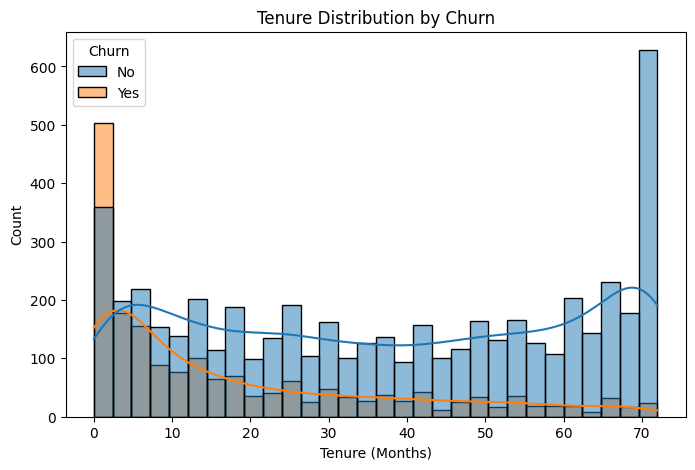

In [8]:
# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()



📌 Project: Customer Churn Prediction
This notebook predicts customer churn using machine learning techniques. It involves data preprocessing, exploratory analysis, and training models to classify whether a customer is likely to leave the service.

📂 Dataset
Telco Customer Churn dataset

Features include demographics, contract details, services used, and billing information

Target variable: Churn (Yes/No)

🔍 Workflow
Data Cleaning & Null Handling

Feature Engineering (Label Encoding, One-Hot Encoding)

Exploratory Data Analysis (EDA)

Model Training: Logistic Regression, Random Forest, etc.

Model Evaluation: Accuracy, Confusion Matrix, Classification Report

📈 Results
Random Forest gave best performance on test data

Highlights patterns in churn behavior

🧠 Libraries Used
Pandas, NumPy, Seaborn, Matplotlib

Scikit-learn for ML models and metrics

🏁 Goal
Help telecom companies identify potential churners early and take preventive measures.